## Five Channel - Experiment 1

The distribution of our data is a lot less complex/diverse so less steps/epochs should be necessary to sufficiently learn the distribution. We have **23,478** pics in our dataset. To reach the same amount of epochs we would need to take (23478x3072)/128 = 563.5K steps. Let's see how far we get. One full epoch after 184 steps. 

Training times: 
- Experiment 1: with microbatching 110s for 10*128 so 8.5s/100pics 


Further important facts about t:
- in every step, for each image in the batch one diffusion step is sampled (using uniform weights or imortance sampling weights)

#### Training progress

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

exp_1_one = pd.read_csv("../Checkpoints/Checkpoint_FiveChan_Exp_1/progress_old_05k.csv")
exp_1_two = pd.read_csv("../Checkpoints/Checkpoint_FiveChan_Exp_1/progress_old_30k.csv")
exp_1_three = pd.read_csv("../Checkpoints/Checkpoint_FiveChan_Exp_1/progress.csv")
exp_1 = pd.concat([exp_1_one, exp_1_two, exp_1_three]).reset_index(drop=True)

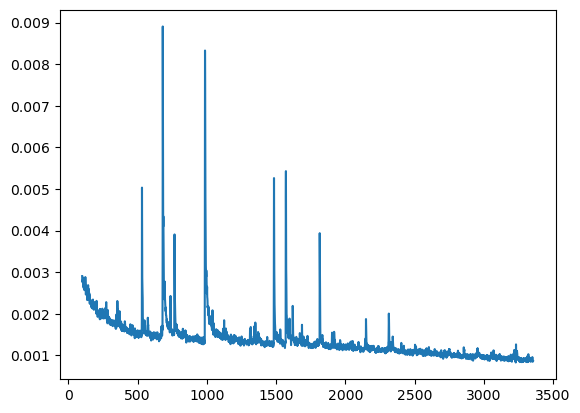

In [13]:

plt.plot(exp_1.loss_q1[100:])
#plt.ylim((0.0075,0.04))

In [15]:
import numpy as np
import matplotlib.pyplot as plt

step = "015000"

# data = np.load(f'../Samples/FiveChan_Exp_1/ema_0.9999_{step}/samples_84x256x256x5.npz')
data = np.load(f'../Samples/FiveChan_Exp_1/model{step}/samples_84x256x256x5.npz')

batches = data[data.files[0]]

FileNotFoundError: [Errno 2] No such file or directory: '../Samples/FiveChan_Exp_1/model015000/samples_84x256x256x5.npz'

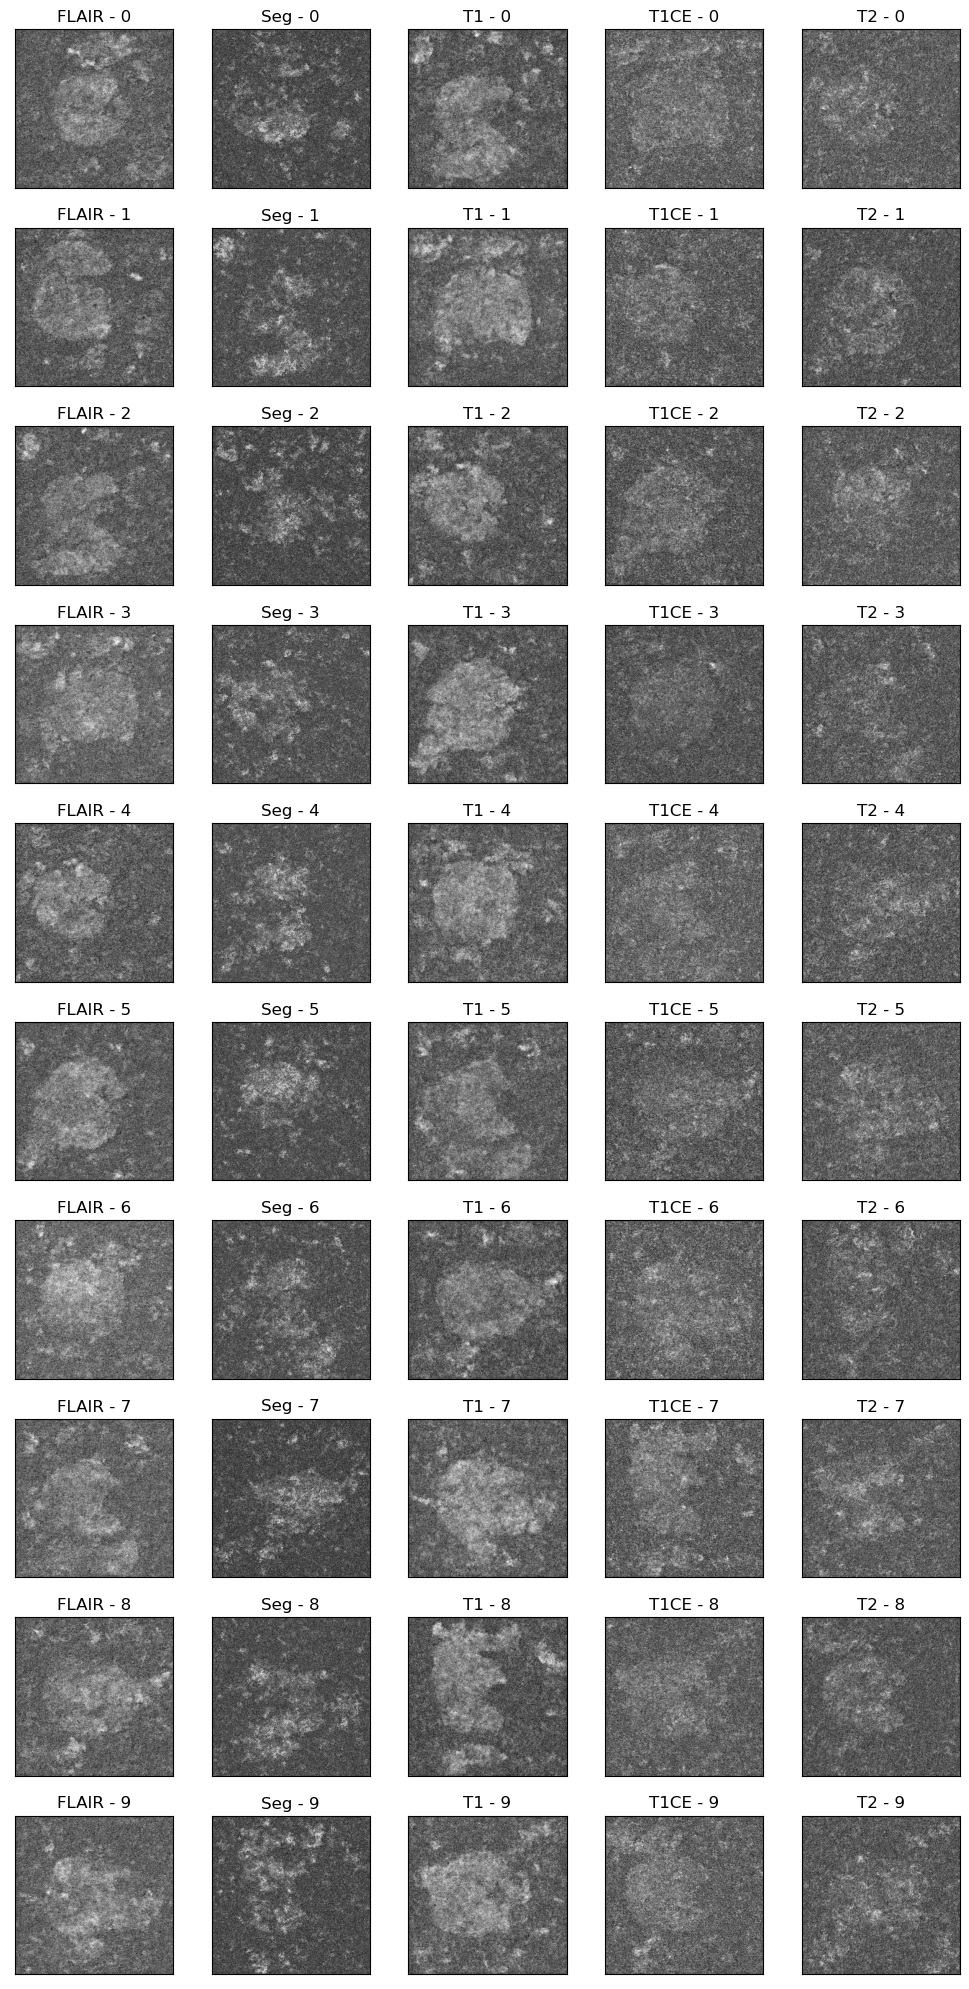

In [14]:
CHANNELS = ['FLAIR', 'Seg', 'T1', 'T1CE', 'T2']

start=0
plt.figure(figsize=(10,20))
for i in range(10):
    for j in range(5):
        plt.subplot(10,5,(i*5)+1+j)
        plt.imshow(batches[i+j+start,:,:,j], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        plt.title(f"{CHANNELS[j]} - {i+start}")
plt.tight_layout()
# plt.savefig(fname="img/T1CE_Exp2_model_20k", dpi=plt.gcf().dpi, bbox_inches='tight')
plt.show()